In [40]:
import maboss
from maboss.figures import plot_observed_graph
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.style.use('seaborn-v0_8-whitegrid')
import sys
import os
import tempfile
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from param_customing import modify_parameters

In [41]:
bnd_file = r".\RELN_NOTCH_LEC_clean.bnd"

## Non-parameterized SIMULATION with arbitrary selection

In [42]:
cfg_file = r".\Parameterized\parameterized_semi_quantitative_parameters.bnd.cfg"

In [43]:
internal_nodes = [
    "CPX4232", "MAML", "NOTCH", "FYN", "SHUTTLEc", "SHUTTLEn", "NICDc", "GAMMA", "RELNR",
    "NICD_DAB2n", "FBXW7_SKP1_CUL1_RBX1", "RBPJ_NCOR", "RBPJ_SNW1", "RELN_RELNR_DAB2",
    "RELN_RELNR_DAB2p_SH3KBP1", "TARGET", "RELN_RELNR_DAB2_SH3KBP1", "CPX2176", "RELN_RELNR",
    "NICDpUb", "CDK8_CCNC", "NEXTt", "ADAM", "NICD_DAB2c", "NICDp_FBXW7_SKP1_CUL1_RBX1",
    "NOTCHcoactivator_CDK8_CCNC", "ADPc", "PROTEASOME", "NICD_RBPJ_SNW1", "NOTCHLUb_NOTCH",
    "TBL1_HDAC3_NCOR", "ADAM_ZN2", "CREBBP", "E3UbLIGASE", "DAB2cp", "EP300", "CPX4233",
    "NICDn", "NOTCHLUb_NOTCHt", "DAB2np", "NOTCHcoactivator", "NOTCHL", "NOTCHL_NOTCH",
    "NICD_SHUTTLE", "CPX4231", "ADPn", "NICDp", "NEXT", "KAT2B"
]

In [44]:
model = maboss.load(bnd_file, cfg_file)
for name in internal_nodes:
    model.network[name].is_internal = True
    
outputs = ['NICDc', 'NICDn', 'PROTEASOME', 'RELN', 'DAB2cp']
model.network.set_output(outputs)

RELN
NICDc
PROTEASOME
DAB2cp
NICDn


<Figure size 1000x600 with 0 Axes>

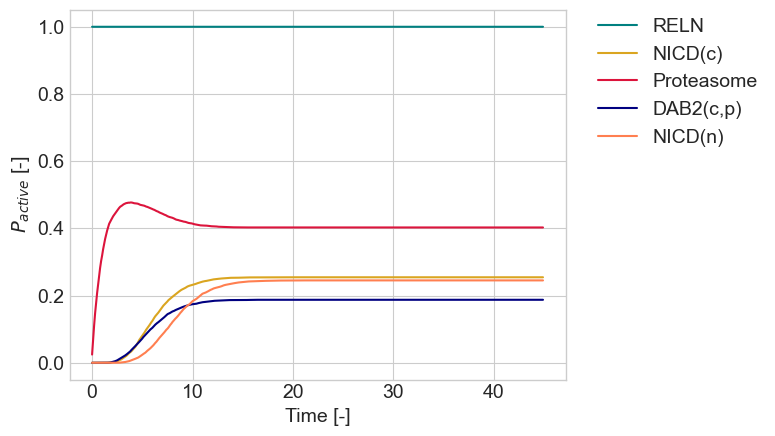

,TH,ErrorTH,H,Prob[RELN -- PROTEASOME -- NICDc],ErrProb[RELN -- PROTEASOME -- NICDc],Prob[RELN -- PROTEASOME -- NICDc -- DAB2cp -- NICDn],ErrProb[RELN -- PROTEASOME -- NICDc -- DAB2cp -- NICDn],Prob[RELN -- NICDc -- DAB2cp -- NICDn],ErrProb[RELN -- NICDc -- DAB2cp -- NICDn],Prob[RELN -- PROTEASOME -- NICDc -- DAB2cp],ErrProb[RELN -- PROTEASOME -- NICDc -- DAB2cp],Prob[RELN -- NICDc -- NICDn],ErrProb[RELN -- NICDc -- NICDn],Prob[RELN -- DAB2cp],ErrProb[RELN -- DAB2cp],Prob[RELN -- PROTEASOME],ErrProb[RELN -- PROTEASOME],Prob[RELN -- PROTEASOME -- NICDn],ErrProb[RELN -- PROTEASOME -- NICDn],Prob[RELN],ErrProb[RELN],Prob[RELN -- NICDc -- DAB2cp],ErrProb[RELN -- NICDc -- DAB2cp],Prob[RELN -- PROTEASOME -- NICDc -- NICDn],ErrProb[RELN -- PROTEASOME -- NICDc -- NICDn],Prob[RELN -- NICDc],ErrProb[RELN -- NICDc],Prob[RELN -- PROTEASOME -- DAB2cp],ErrProb[RELN -- PROTEASOME -- DAB2cp]
0.0,0.0,0.0,0.1662,0.0,0.0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0000,0.000000,0.0000,0.000000,0.024543,0.001270,0.0,0.0,0.975457,0.001270,0.0,0.0,0.0,0.0,0.0000,0.00000,0.0,0.0
0.1,0.0,0.0,0.3638,0.0,0.0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0000,0.000000,0.0000,0.000000,0.069432,0.002401,0.0,0.0,0.930568,0.002401,0.0,0.0,0.0,0.0,0.0000,0.00000,0.0,0.0
0.2,0.0,0.0,0.5006,0.0,0.0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0000,0.000000,0.0000,0.000000,0.110227,0.003013,0.0,0.0,0.889773,0.003013,0.0,0.0,0.0,0.0,0.0000,0.00000,0.0,0.0
0.3,0.0,0.0,0.6031,0.0,0.0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0000,0.000000,0.0000,0.000000,0.147340,0.003467,0.0,0.0,0.852660,0.003467,0.0,0.0,0.0,0.0,0.0000,0.00000,0.0,0.0
0.4,0.0,0.0,0.6772,0.0,0.0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0000,0.000000,0.0000,0.000000,0.178678,0.003766,0.0,0.0,0.821322,0.003766,0.0,0.0,0.0,0.0,0.0000,0.00000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44.5,0.0,0.0,2.1488,0.0,0.0,0.0,0.0,0.0809,0.002727,0.0,0.0,0.1643,0.003706,0.1066,0.003086,0.402700,0.004905,0.0,0.0,0.236200,0.004248,0.0,0.0,0.0,0.0,0.0093,0.00096,0.0,0.0
44.6,0.0,0.0,2.1488,0.0,0.0,0.0,0.0,0.0809,0.002727,0.0,0.0,0.1643,0.003706,0.1066,0.003086,0.402700,0.004905,0.0,0.0,0.236200,0.004248,0.0,0.0,0.0,0.0,0.0093,0.00096,0.0,0.0
44.7,0.0,0.0,2.1488,0.0,0.0,0.0,0.0,0.0809,0.002727,0.0,0.0,0.1643,0.003706,0.1066,0.003086,0.402700,0.004905,0.0,0.0,0.236200,0.004248,0.0,0.0,0.0,0.0,0.0093,0.00096,0.0,0.0
44.8,0.0,0.0,2.1488,0.0,0.0,0.0,0.0,0.0809,0.002727,0.0,0.0,0.1643,0.003706,0.1066,0.003086,0.402700,0.004905,0.0,0.0,0.236200,0.004248,0.0,0.0,0.0,0.0,0.0093,0.00096,0.0,0.0


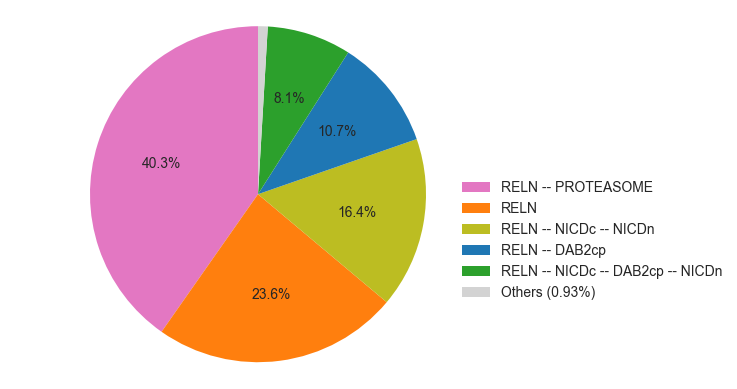

In [45]:
result = model.run()

plt.close('all')
plt.figure(figsize=(10, 6))
result.plot_node_trajectory()

ax = plt.gca()
for line in ax.get_lines():
    line.set_linewidth(1.5) 
    print(line.get_label())

colors = ["teal", "goldenrod", "crimson", "navy", "coral"]

for line, color in zip(ax.get_lines(), colors):
     line.set_color(color)

plt.xlabel("Time [-]", fontsize=14)
plt.ylabel(r"$P_{active}$ [-]", fontsize=14)
custom_labels = ['RELN', 'NICD(c)', 'Proteasome', 'DAB2(c,p)', 'NICD(n)']  

plt.legend(custom_labels, loc="upper left", bbox_to_anchor=(1.05, 1), fontsize=14, borderaxespad=0.)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig(r".\MaBoSS_figures\semi_quantitative.png", dpi=600, bbox_inches='tight')
plt.show()

result.plot_piechart()
result.get_states_probtraj_full()

## Sensitivity Analysis

In [46]:
result = maboss.pipelines.simulate_single_mutants(model, ['RELN', 'ADAM', 'GAMMA', 'NICDc', 'PROTEASOME', 'FYN', 'SH3KBP1'])
result

{('RELN', 'ON'): <maboss.result.Result at 0x210710e5090>,
 ('ADAM', 'ON'): <maboss.result.Result at 0x210710e5810>,
 ('GAMMA', 'ON'): <maboss.result.Result at 0x210710e4690>,
 ('NICDc', 'ON'): <maboss.result.Result at 0x210710e4e10>,
 ('PROTEASOME', 'ON'): <maboss.result.Result at 0x210710e4550>,
 ('FYN', 'ON'): <maboss.result.Result at 0x210710e56d0>,
 ('SH3KBP1', 'ON'): <maboss.result.Result at 0x210710e4a50>,
 ('RELN', 'OFF'): <maboss.result.Result at 0x21076bd34d0>,
 ('ADAM', 'OFF'): <maboss.result.Result at 0x21076bd3ed0>,
 ('GAMMA', 'OFF'): <maboss.result.Result at 0x21076bd3890>,
 ('NICDc', 'OFF'): <maboss.result.Result at 0x21076bd3610>,
 ('PROTEASOME', 'OFF'): <maboss.result.Result at 0x21076bd3750>,
 ('FYN', 'OFF'): <maboss.result.Result at 0x21076bd3b10>,
 ('SH3KBP1', 'OFF'): <maboss.result.Result at 0x21076bd39d0>}

## Knockout & overexpression: RELN

In [47]:
reln_states = [
    ("RELN: 100% (Control)", {'RELN': (0, 1)}),
    ("RELN: 75%", {'RELN': (0.25, 0.75)}),
    ("RELN: 50%", {'RELN': (0.50, 0.50)}),
    ("RELN: 25%", {'RELN': (0.75, 0.25)}),
    ("RELN: 0%", {'RELN': (1.00, 0.00)}),
]

outputs = ['RELN', 'DAB2cp', 'NICDc', 'NICDn', 'PROTEASOME']
custom_labels = ['RELN', 'NICD(c)', 'Proteasome', 'DAB2(c,p)', 'NICD(n)']
colors = ["teal", "goldenrod", "crimson", "navy", "coral"]

RELN
NICDc
PROTEASOME
DAB2cp
NICDn


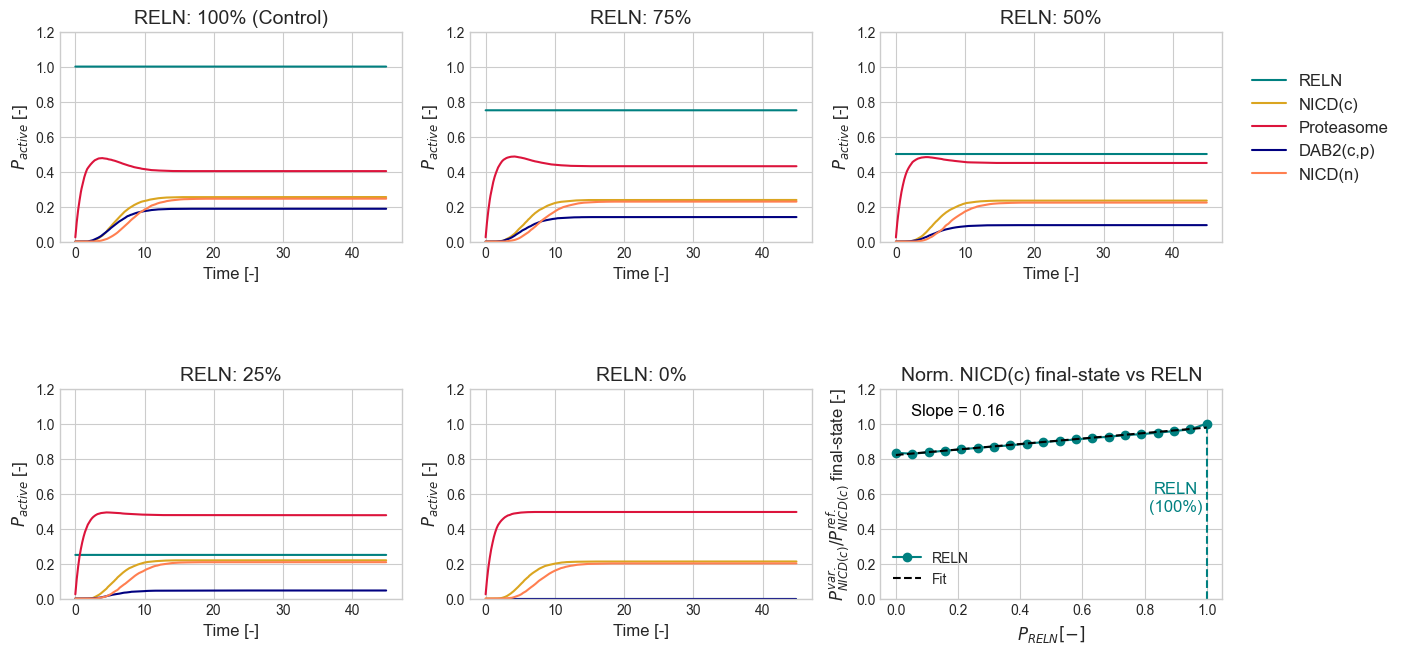

At RELN = 0.6, predicted normalized NICD(c) = 0.915
At RELN = 0, predicted normalized NICD(c) = 0.821


In [48]:
plt.close('all')

fig = plt.figure(figsize=(15, 12))  
gs = gridspec.GridSpec(3, 6, figure=fig)
gs.update(wspace=0.5, hspace=0.7)

axs = [
    fig.add_subplot(gs[0, 0:2]),  
    fig.add_subplot(gs[0, 2:4]),  
    fig.add_subplot(gs[0, 4:6]),  
    fig.add_subplot(gs[1, 0:2]), 
    fig.add_subplot(gs[1, 2:4]),
    fig.add_subplot(gs[1, 4:6]),  
]

nicdc_curves = []
target_curves = []
x_vals = None

for i, (label, reln_prob) in enumerate(reln_states):
    modified_cfg = os.path.join(tempfile.gettempdir(), f"cfg_{label}_random.bnd.cfg")
    modify_parameters(cfg_file, modified_cfg, reln_prob)

    model = maboss.load(bnd_file, modified_cfg)
    for name in internal_nodes:
        model.network[name].is_internal = True
    model.network.set_output(outputs)
    result = model.run()

    result.plot_node_trajectory()
    temp_ax = plt.gca()
    lines = temp_ax.get_lines()
    plt.close()
    
    ax = axs[i]
    for line, color, label_name in zip(lines, colors, custom_labels):
        ax.plot(line.get_xdata(), line.get_ydata(), color=color, linewidth=1.5, label=label_name)

    if x_vals is None:
        x_vals = lines[0].get_xdata()
    nicdc_curves.append(lines[1].get_ydata())

    ax.set_title(label, fontsize=14)
    ax.set_xlabel("Time [-]", fontsize=12)
    ax.set_ylabel(r"$P_{active}$ [-]", fontsize=12)
    ax.tick_params(labelsize=10)
    ax.set_ylim(0, 1.2)

for line in lines:
    print(line.get_label())
    
nicdc_ref = nicdc_curves[0]

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="center left", bbox_to_anchor=(0.91, 0.8), fontsize=12)

fig.tight_layout(rect=[0, 0, 0.88, 1])

reln_values = np.linspace(0, 1, 20)
nicdc_steady_values = []

for val in reln_values:
    reln_prob = {'RELN': (1 - val, val)}
    modified_cfg = os.path.join(tempfile.gettempdir(), f"cfg_RELN_{val:.2f}_sweep.bnd.cfg")
    modify_parameters(cfg_file, modified_cfg, reln_prob)

    model = maboss.load(bnd_file, modified_cfg)
    for name in internal_nodes:
        model.network[name].is_internal = True
    model.network.set_output(outputs)
    result = model.run()

    result.plot_node_trajectory()
    temp_ax = plt.gca()
    lines = temp_ax.get_lines()
    plt.close()

    nicdc_line = lines[1]
    nicdc_steady_values.append(nicdc_line.get_ydata()[-1])
    
axs[5].plot(reln_values, nicdc_steady_values/nicdc_ref[-1], marker='o', color='teal', label="RELN")
axs[5].set_title("Norm. NICD(c) final-state vs RELN", fontsize=14)
axs[5].set_xlabel(r"$P_{RELN} [-]$", fontsize=12)
axs[5].set_ylabel(r"$P^{var.}_{NICD(c)}/P^{ref.}_{NICD(c)}$ final-state [-]", fontsize=12)
axs[5].vlines(x=1.0, ymin=0, ymax=1.0, color='teal', linestyle='--', linewidth=1.5)
axs[5].text(0.9, 0.5, 'RELN\n(100%)', color='teal', fontsize=12, ha='center')
axs[5].tick_params(labelsize=10)
axs[5].set_ylim(0, 1.2)

reln_values_clean = np.array(reln_values)[~np.isnan(nicdc_steady_values)]
nicdc_clean = np.array(nicdc_steady_values)[~np.isnan(nicdc_steady_values)]
slope, intercept = np.polyfit(reln_values_clean, nicdc_clean/nicdc_ref[-1], 1)
fit_line_RELN = slope * reln_values_clean + intercept
axs[5].text(0.05, 1.05, f"Slope = {slope:.2f}", fontsize=12, color='black')
axs[5].plot(reln_values_clean, fit_line_RELN, linestyle='--', color='black', label='Fit', zorder=5)
axs[5].legend(fontsize=10)

fig.savefig(
    r".\MaBoSS_figures\RELN_knockout_overexpression_semi_quantitative.png",
    dpi=600,
    bbox_inches='tight'
)

plt.show()
x_target = 0.6
y_target = slope * x_target + intercept
print(f"At RELN = {x_target}, predicted normalized NICD(c) = {y_target:.3f}")

x_target = 0
y_target = slope * x_target + intercept
print(f"At RELN = {x_target}, predicted normalized NICD(c) = {y_target:.3f}")

* # Knockout & overexpression: VLDR/LRP8

In [49]:
vldr_lrp8_states = [
    ("VLDLR, LRP8: 100%", {'VLDLR': (0, 1), 'LRP8': (0, 1)}),
    ("VLDLR, LRP8: 75%", {'VLDLR': (0.25, 0.75), 'LRP8': (0.25, 0.75)}),
    ("Control", {'Modification': False}),
    ("VLDLR, LRP8: 25%", {'VLDLR': (0.75, 0.25), 'LRP8': (0.75, 0.25)}),
    ("VLDLR, LRP8: 0%", {'VLDLR': (1.00, 0.00), 'LRP8': (1.00, 0.00)}),
]

outputs = ['VLDLR', 'LRP8', 'NICDc', 'PROTEASOME', 'DAB2cp', 'NICDn']
custom_labels = ['LRP8', 'VLDLR', 'NICD(c)', 'Proteasome', 'DAB2(c,p)', 'NICD(n)']
colors = ["violet", "teal", "goldenrod", "crimson", "navy", "coral"]

LRP8
VLDLR
NICDc
PROTEASOME
DAB2cp
NICDn
Slope VLDLR: 0.1007
Slope LRP8 : 0.1007


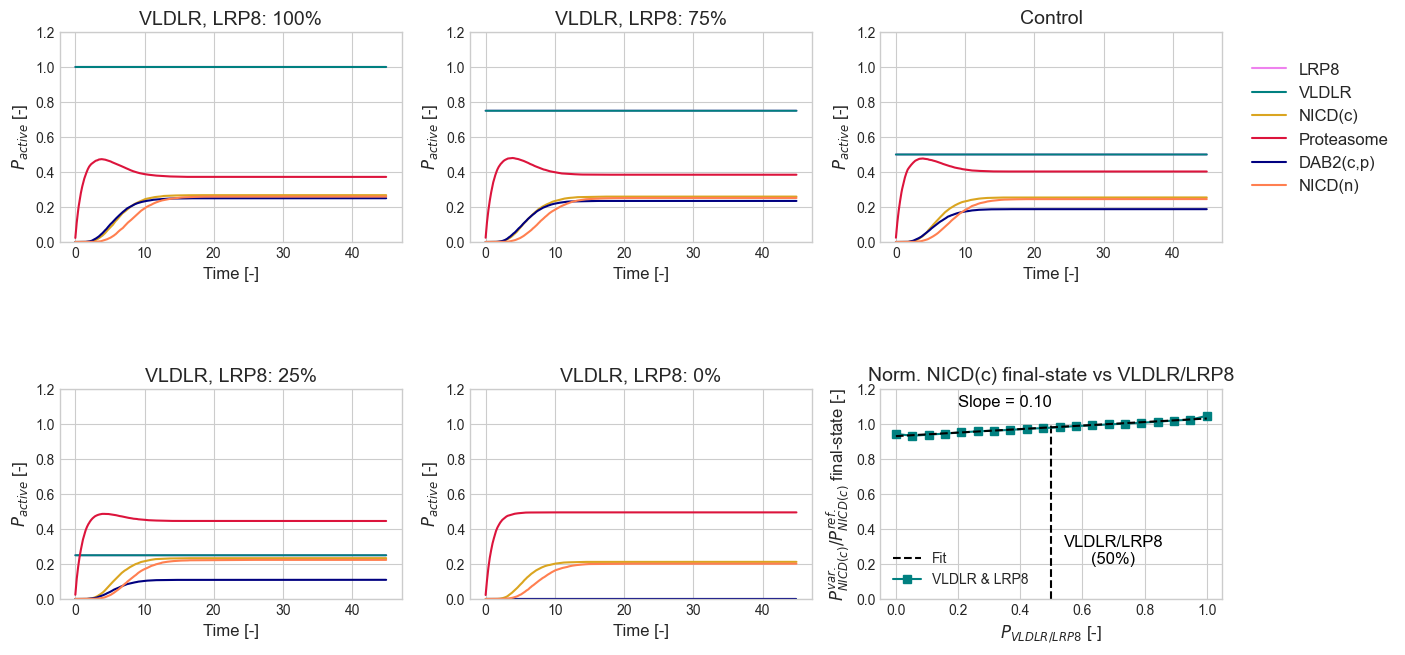

NICD(c) normalized at VLDLR=0.6: 0.9910
NICD(c) normalized at LRP8 =0.6: 0.9910
NICD(c) normalized at VLDLR=0: 0.9306
NICD(c) normalized at LRP8 =0: 0.9306


In [50]:
plt.close('all')

fig = plt.figure(figsize=(15, 12))  
gs = gridspec.GridSpec(3, 6, figure=fig)
gs.update(wspace=0.5, hspace=0.7)

axs = [
    fig.add_subplot(gs[0, 0:2]),  
    fig.add_subplot(gs[0, 2:4]),  
    fig.add_subplot(gs[0, 4:6]),  
    fig.add_subplot(gs[1, 0:2]), 
    fig.add_subplot(gs[1, 2:4]),
    fig.add_subplot(gs[1, 4:6]),
]

nicdc_curves = []
target_curves = []
x_vals = None

for i, (label, vldlr_lrp8_prob) in enumerate(vldr_lrp8_states):
    modified_cfg = os.path.join(tempfile.gettempdir(), f"cfg_{label}_random.bnd.cfg")
    modify_parameters(cfg_file, modified_cfg, vldlr_lrp8_prob)

    model = maboss.load(bnd_file, modified_cfg)
    for name in internal_nodes:
        model.network[name].is_internal = True
    model.network.set_output(outputs)
    result = model.run()

    result.plot_node_trajectory()
    temp_ax = plt.gca()
    lines = temp_ax.get_lines()
    plt.close()

    ax = axs[i]
    for line, color, label_name in zip(lines, colors, custom_labels):
        ax.plot(line.get_xdata(), line.get_ydata(), color=color, linewidth=1.5, label=label_name)

    if x_vals is None:
        x_vals = lines[0].get_xdata()
    nicdc_curves.append(lines[2].get_ydata())
    target_curves.append(lines[3].get_ydata())

    ax.set_title(label, fontsize=14)
    ax.set_xlabel("Time [-]", fontsize=12)
    ax.set_ylabel(r"$P_{active}$ [-]", fontsize=12)
    ax.tick_params(labelsize=10)
    ax.set_ylim(0, 1.2)

for line in lines:
    print(line.get_label())
    
nicdc_ref = nicdc_curves[2]

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="center left", bbox_to_anchor=(0.91, 0.8), fontsize=12)

fig.tight_layout(rect=[0, 0, 0.88, 1])

vldlr_values = lrp8_values = np.linspace(0, 1, 20)
nicdc_steady_values_vldlr = []
nicdc_steady_values_lrp8 = []

for val in vldlr_values:
    vldlr_prob = {'VLDLR': (1 - val, val)}
    modified_cfg = os.path.join(tempfile.gettempdir(), f"cfg_VLDLR_{val:.2f}_sweep.bnd.cfg")
    modify_parameters(cfg_file, modified_cfg, vldlr_prob)

    model = maboss.load(bnd_file, modified_cfg)
    for name in internal_nodes:
        model.network[name].is_internal = True
    model.network.set_output(outputs)
    result = model.run()

    result.plot_node_trajectory()
    lines = plt.gca().get_lines()
    plt.close()

    try:
        nicdc_line = lines[2]
        nicdc_steady_values_vldlr.append(nicdc_line.get_ydata()[-1])
    except (ValueError, IndexError):
        nicdc_steady_values_vldlr.append(np.nan)

for val in lrp8_values:
    lrp8_prob = {'LRP8': (1 - val, val)}
    modified_cfg = os.path.join(tempfile.gettempdir(), f"cfg_LRP8_{val:.2f}_sweep.bnd.cfg")
    modify_parameters(cfg_file, modified_cfg, lrp8_prob)

    model = maboss.load(bnd_file, modified_cfg)
    for name in internal_nodes:
        model.network[name].is_internal = True
    model.network.set_output(outputs)
    result = model.run()

    result.plot_node_trajectory()
    lines = plt.gca().get_lines()
    plt.close()

    try:
        nicdc_line = lines[2]
        nicdc_steady_values_lrp8.append(nicdc_line.get_ydata()[-1])
    except (ValueError, IndexError):
        nicdc_steady_values_lrp8.append(np.nan)

axs[5].set_title("Norm. NICD(c) final-state vs VLDLR/LRP8", fontsize=14)
axs[5].set_xlabel(r"$P_{VLDLR/LRP8}$ [-]", fontsize=12)
axs[5].set_ylabel(r"$P^{var.}_{NICD(c)}/P^{ref.}_{NICD(c)}$ final-state [-]", fontsize=12)
axs[5].tick_params(labelsize=10)
axs[5].set_ylim(0, 1.2)

custom_lines = []
custom_labels = []

# Compute both slopes but only plot one (since they're the same)
clean_vldlr_x = np.array(vldlr_values)[~np.isnan(nicdc_steady_values_vldlr)]
clean_vldlr_y = np.array(nicdc_steady_values_vldlr)[~np.isnan(nicdc_steady_values_vldlr)]

clean_lrp8_x = np.array(lrp8_values)[~np.isnan(nicdc_steady_values_lrp8)]
clean_lrp8_y = np.array(nicdc_steady_values_lrp8)[~np.isnan(nicdc_steady_values_lrp8)]

if len(clean_vldlr_x) > 1 and len(clean_lrp8_x) > 1:
    slope_vldlr, intercept_vldlr = np.polyfit(clean_vldlr_x, clean_vldlr_y / nicdc_ref[-1], 1)
    slope_lrp8, intercept_lrp8 = np.polyfit(clean_lrp8_x, clean_lrp8_y / nicdc_ref[-1], 1)

    print(f"Slope VLDLR: {slope_vldlr:.4f}")
    print(f"Slope LRP8 : {slope_lrp8:.4f}")

    fit_VLDLR_LRP8 = slope_vldlr * clean_vldlr_x + intercept_vldlr
    axs[5].plot(clean_vldlr_x, fit_VLDLR_LRP8, linestyle='--', linewidth=1.5, color='black', label="Fit", zorder=5)
    axs[5].text(0.2, 1.1, f"Slope = {slope_vldlr:.2f}", color='black', fontsize=12, ha='left')

axs[5].vlines(x=0.5, ymin=0, ymax=1.0, color='black', linestyle='--', linewidth=1.5)
axs[5].text(0.7, 0.2, 'VLDLR/LRP8\n(50%)', color='black', fontsize=12, ha='center')
axs[5].plot(lrp8_values, np.array(nicdc_steady_values_lrp8) / nicdc_ref[-1], 
            marker='s', color='teal', label="VLDLR & LRP8")

axs[5].set_title("Norm. NICD(c) final-state vs VLDLR/LRP8", fontsize=14)
axs[5].set_xlabel(r"$P_{VLDLR/LRP8}$ [-]", fontsize=12)
axs[5].set_ylabel(r"$P^{var.}_{NICD(c)}/P^{ref.}_{NICD(c)}$ final-state [-]", fontsize=12)
axs[5].tick_params(labelsize=10)
axs[5].set_ylim(0, 1.2)
axs[5].legend(fontsize=10)


fig.savefig(
    r".\MaBoSS_figures\VLDLR_LRP8_knockout_overexpression_semi_quantitative.png",
    dpi=600,
    bbox_inches='tight'
)

plt.show()
val = 0.6
nicdc_vldlr = slope_vldlr * val + intercept_vldlr
nicdc_lrp8 = slope_lrp8 * val + intercept_lrp8

print(f"NICD(c) normalized at VLDLR=0.6: {nicdc_vldlr:.4f}")
print(f"NICD(c) normalized at LRP8 =0.6: {nicdc_lrp8:.4f}")

val = 0
nicdc_vldlr = slope_vldlr * val + intercept_vldlr
nicdc_lrp8 = slope_lrp8 * val + intercept_lrp8

print(f"NICD(c) normalized at VLDLR=0: {nicdc_vldlr:.4f}")
print(f"NICD(c) normalized at LRP8 =0: {nicdc_lrp8:.4f}")



* # Knockout & overexpression: DAB2

In [51]:
dab2_states = [
    ("DAB2: 100% (Control)", {'DAB2': (0, 1)}),
    ("DAB2: 75%", {'DAB2': (0.25, 0.75)}),
    ("DAB2: 50%", {'DAB2': (0.50, 0.50)}),
    ("DAB2: 25%", {'DAB2': (0.75, 0.25)}),
    ("DAB2: 0%", {'DAB2': (1.00, 0.00)}),
]

outputs = ['DAB2', 'NICDc', 'PROTEASOME', 'DAB2cp', 'NICDn']
custom_labels = ['DAB2', 'NICD(c)', 'Proteasome', 'DAB2(c,p)', 'NICD(n)']
colors = ["teal", "goldenrod", "crimson", "navy", "coral"]

DAB2
NICDc
PROTEASOME
DAB2cp
NICDn


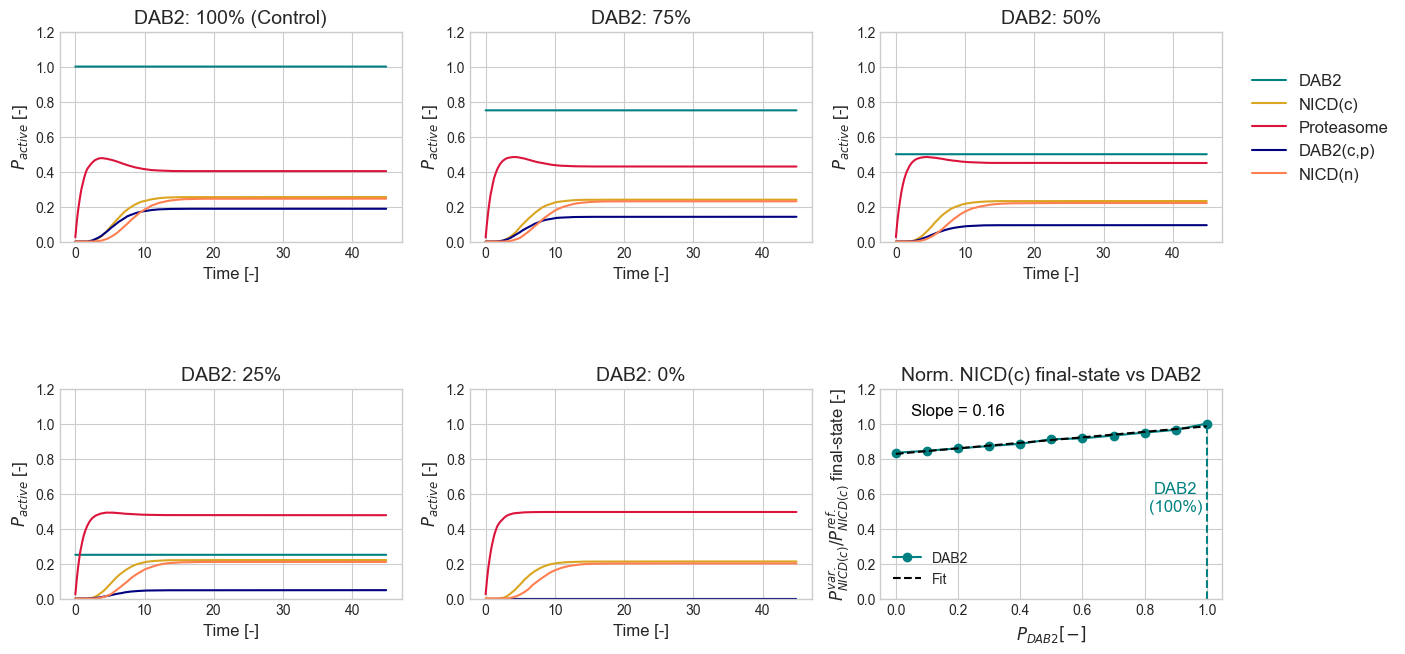

At DAB2 = 0.6, predicted normalized NICD(c) = 0.922
At DAB2 = 0, predicted normalized NICD(c) = 0.827


In [52]:
plt.close('all')

fig = plt.figure(figsize=(15, 12))  
gs = gridspec.GridSpec(3, 6, figure=fig)
gs.update(wspace=0.5, hspace=0.7)

axs = [
    fig.add_subplot(gs[0, 0:2]),  
    fig.add_subplot(gs[0, 2:4]),  
    fig.add_subplot(gs[0, 4:6]),  
    fig.add_subplot(gs[1, 0:2]), 
    fig.add_subplot(gs[1, 2:4]),
    fig.add_subplot(gs[1, 4:6]),  
]

nicdc_curves = []
target_curves = []
x_vals = None

for i, (label, dab2_prob) in enumerate(dab2_states):
    modified_cfg = os.path.join(tempfile.gettempdir(), f"cfg_{label}_random.bnd.cfg")
    modify_parameters(cfg_file, modified_cfg, dab2_prob)

    model = maboss.load(bnd_file, modified_cfg)
    for name in internal_nodes:
        model.network[name].is_internal = True
    model.network.set_output(outputs)
    result = model.run()

    result.plot_node_trajectory()
    temp_ax = plt.gca()
    lines = temp_ax.get_lines()
    plt.close()
    
    ax = axs[i]
    for line, color, label_name in zip(lines, colors, custom_labels):
        ax.plot(line.get_xdata(), line.get_ydata(), color=color, linewidth=1.5, label=label_name)

    if x_vals is None:
        x_vals = lines[0].get_xdata()
    nicdc_curves.append(lines[1].get_ydata())
    target_curves.append(lines[2].get_ydata())

    ax.set_title(label, fontsize=14)
    ax.set_xlabel("Time [-]", fontsize=12)
    ax.set_ylabel(r"$P_{active}$ [-]", fontsize=12)
    ax.tick_params(labelsize=10)
    ax.set_ylim(0, 1.2)

for line in lines:
    print(line.get_label())
    
nicdc_ref = nicdc_curves[0]
target_ref = target_curves[0]

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="center left", bbox_to_anchor=(0.91, 0.8), fontsize=12)

fig.tight_layout(rect=[0, 0, 0.88, 1])

dab2_values = np.linspace(0, 1, 11)
nicdc_steady_values = []

for val in dab2_values:
    dab2_prob = {'DAB2': (1 - val, val)}
    modified_cfg = os.path.join(tempfile.gettempdir(), f"cfg_DAB2_{val:.2f}_sweep.bnd.cfg")
    modify_parameters(cfg_file, modified_cfg, dab2_prob)

    model = maboss.load(bnd_file, modified_cfg)
    for name in internal_nodes:
        model.network[name].is_internal = True
    model.network.set_output(outputs)
    result = model.run()

    result.plot_node_trajectory()
    temp_ax = plt.gca()
    lines = temp_ax.get_lines()
    plt.close()

    nicdc_line = lines[1]
    nicdc_steady_values.append(nicdc_line.get_ydata()[-1])
    
axs[5].plot(dab2_values, nicdc_steady_values/nicdc_ref[-1], marker='o', color='teal', label="DAB2")
axs[5].set_title("Norm. NICD(c) final-state vs DAB2", fontsize=14)
axs[5].set_xlabel(r"$P_{DAB2} [-]$", fontsize=12)
axs[5].set_ylabel(r"$P^{var.}_{NICD(c)}/P^{ref.}_{NICD(c)}$ final-state [-]", fontsize=12)
axs[5].vlines(x=1.0, ymin=0, ymax=1.0, color='teal', linestyle='--', linewidth=1.5)
axs[5].text(0.9, 0.5, 'DAB2\n(100%)', color='teal', fontsize=12, ha='center')
axs[5].tick_params(labelsize=10)
axs[5].set_ylim(0, 1.2)

dab2_values_clean = np.array(dab2_values)[~np.isnan(nicdc_steady_values)]
nicdc_clean = np.array(nicdc_steady_values)[~np.isnan(nicdc_steady_values)]
slope, intercept = np.polyfit(dab2_values_clean, nicdc_clean/nicdc_ref[-1], 1)
fit_line_DAB2 = slope * dab2_values_clean + intercept
axs[5].text(0.05, 1.05, f"Slope = {slope:.2f}", fontsize=12, color='black')
axs[5].plot(dab2_values_clean, fit_line_DAB2, linestyle='--', color='black', label='Fit', zorder=5)
axs[5].legend(fontsize=10)

fig.savefig(
    r".\MaBoSS_figures\DAB2_knockout_overexpression_semi_quantitative.png",
    dpi=600,
    bbox_inches='tight'
)

plt.show()
x_target = 0.6
y_target = slope * x_target + intercept
print(f"At DAB2 = {x_target}, predicted normalized NICD(c) = {y_target:.3f}")

x_target = 0
y_target = slope * x_target + intercept
print(f"At DAB2 = {x_target}, predicted normalized NICD(c) = {y_target:.3f}")

* # Knockout & overexpression: ADAM

In [53]:
adam_states = [
    ("Control", {'Modification': False}),
    ("ADAM10, ADAM17: 100%", {'ADAM10': (0, 1), 'ADAM17': (0, 1)}),
    ("ADAM10, ADAM17: 75%", {'ADAM10': (0.25, 0.75), 'ADAM17': (0.25, 0.75)}),
    ("ADAM10, ADAM17: 50%", {'ADAM10': (0.50, 0.50), 'ADAM17': (0.50, 0.50)}),
    ("ADAM10, ADAM17: 25%", {'ADAM10': (0.75, 0.25), 'ADAM17': (0.75, 0.25)}),
    ("ADAM10, ADAM17: 0%", {'ADAM10': (1.00, 0.00), 'ADAM17': (1.00, 0.00)}),
]

outputs = ['ADAM_ZN2', 'NICDc', 'PROTEASOME', 'DAB2cp', 'NICDn']
custom_labels = ['NICD(c)', 'Proteasome', 'ADAM', 'DAB2(c,p)', 'NICD(n)']
colors = ["goldenrod", "crimson", "teal", "navy", "coral"]

NICDc
PROTEASOME
ADAM_ZN2
DAB2cp
NICDn


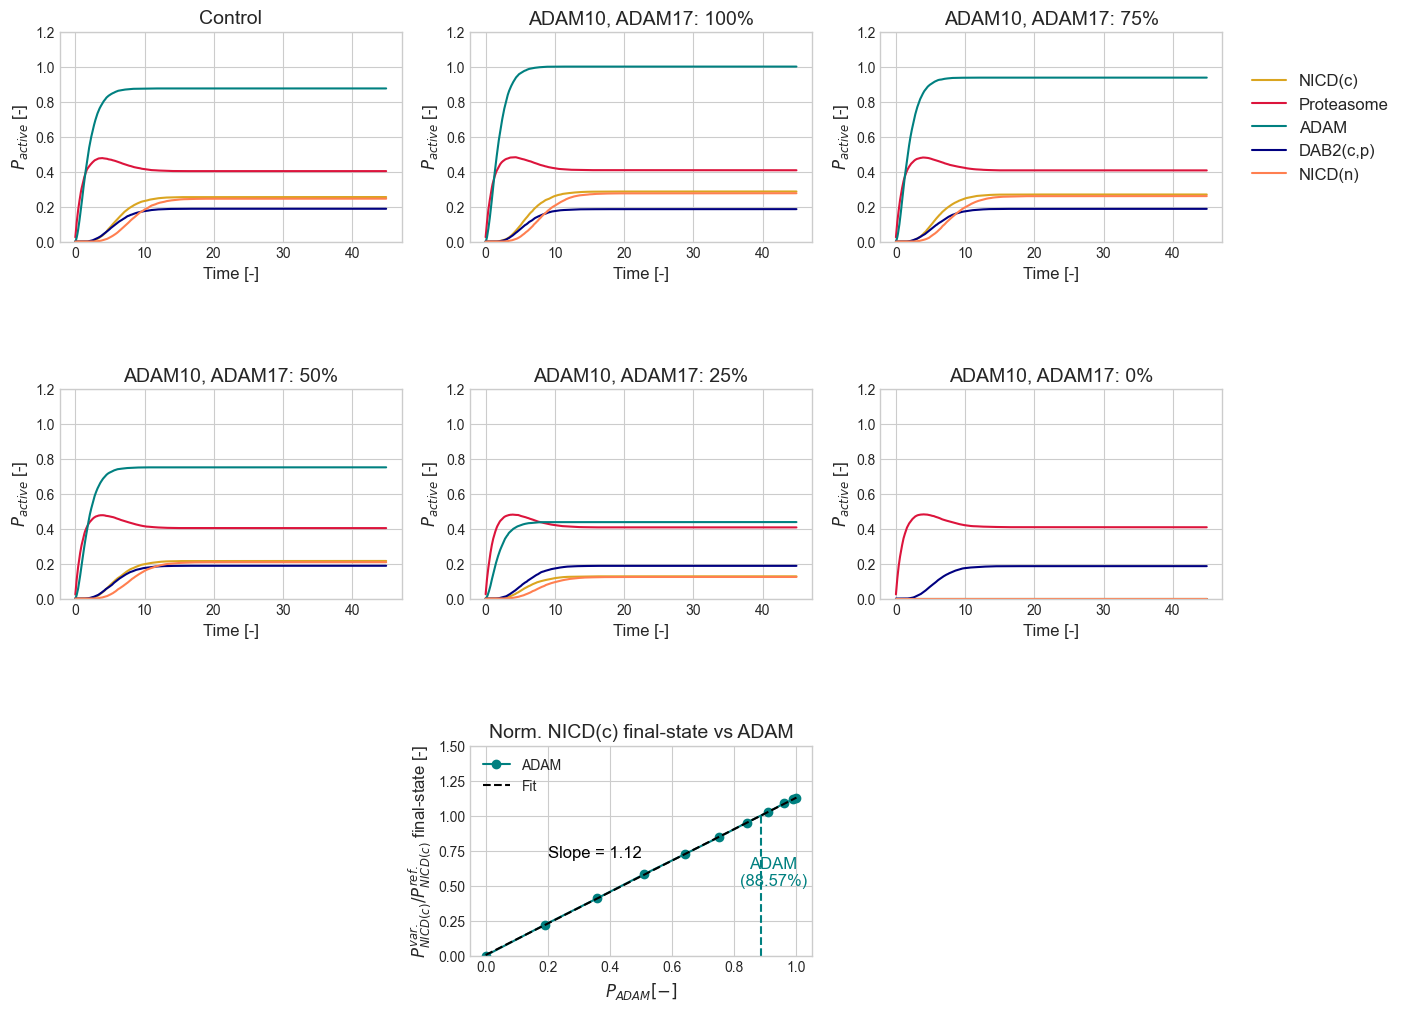

At ADAM = 0.33584, predicted normalized NICD(c) = 0.382


In [54]:
fig = plt.figure(figsize=(15, 12))  
gs = gridspec.GridSpec(3, 6, figure=fig)
gs.update(wspace=0.5, hspace=0.7)

axs = [
    fig.add_subplot(gs[0, 0:2]),  
    fig.add_subplot(gs[0, 2:4]),  
    fig.add_subplot(gs[0, 4:6]),  
    fig.add_subplot(gs[1, 0:2]), 
    fig.add_subplot(gs[1, 2:4]),
    fig.add_subplot(gs[1, 4:6]), 
    fig.add_subplot(gs[2, 2:4]),  
]

nicdc_curves = []
target_curves = []
x_vals = None

for i, (label, adam_prob) in enumerate(adam_states):
    modified_cfg = os.path.join(tempfile.gettempdir(), f"cfg_{label}_random.bnd.cfg")
    modify_parameters(cfg_file, modified_cfg, adam_prob)

    model = maboss.load(bnd_file, modified_cfg)
    for name in internal_nodes:
        model.network[name].is_internal = True
    model.network.set_output(outputs)
    result = model.run()

    result.plot_node_trajectory()
    temp_ax = plt.gca()
    lines = temp_ax.get_lines()
    plt.close()

    ax = axs[i]
    for line, color, label_name in zip(lines, colors, custom_labels):
        ax.plot(line.get_xdata(), line.get_ydata(), color=color, linewidth=1.5, label=label_name)

    if x_vals is None:
        x_vals = lines[0].get_xdata()
    nicdc_curves.append(lines[0].get_ydata())
    
    ax.set_title(label, fontsize=14)
    ax.set_xlabel("Time [-]", fontsize=12)
    ax.set_ylabel(r"$P_{active}$ [-]", fontsize=12)
    ax.tick_params(labelsize=10)
    ax.set_ylim(0, 1.2)

for line in lines:
    print(line.get_label())
    
nicdc_ref = nicdc_curves[0]

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="center left", bbox_to_anchor=(0.91, 0.8), fontsize=12)

fig.tight_layout(rect=[0, 0, 0.88, 1])

adam_values = np.linspace(0, 1, 11)
adam_nicdc_steady_values = []
adam_steady_values = []

for val in adam_values:
    adam_prob = {'ADAM10': (1 - val, val), 'ADAM17': (1 - val, val)}
    modified_cfg = os.path.join(tempfile.gettempdir(), f"cfg_ADAM_{val:.2f}_sweep.bnd.cfg")
    modify_parameters(cfg_file, modified_cfg, adam_prob)

    model = maboss.load(bnd_file, modified_cfg)
    for name in internal_nodes:
        model.network[name].is_internal = True
    model.network.set_output(outputs)
    result = model.run()

    result.plot_node_trajectory()
    temp_ax = plt.gca()
    lines = temp_ax.get_lines()
    plt.close()

    nicdc_line = lines[0]
    adam_line = lines[2]
    adam_nicdc_steady_values.append(nicdc_line.get_ydata()[-1])
    adam_steady_values.append(adam_line.get_ydata()[-1])
    
axs[6].plot(adam_steady_values, adam_nicdc_steady_values/nicdc_ref[-1], marker='o', color='teal', label="ADAM")
axs[6].set_title("Norm. NICD(c) final-state vs ADAM", fontsize=14)
axs[6].set_xlabel(r"$P_{ADAM} [-]$", fontsize=12)
axs[6].set_ylabel(r"$P^{var.}_{NICD(c)}/P^{ref.}_{NICD(c)}$ final-state [-]", fontsize=12)
axs[6].tick_params(labelsize=10)
axs[6].set_ylim(0, 1.5)

adam_values_clean = np.array(adam_steady_values)[~np.isnan(adam_nicdc_steady_values)]
adam_nicdc_clean = np.array(adam_nicdc_steady_values)[~np.isnan(adam_nicdc_steady_values)]

slope, intercept = np.polyfit(adam_values_clean, adam_nicdc_clean / nicdc_ref[-1], 1)
fit_line_ADAM = slope * adam_values_clean + intercept
adam_at_nicdc_eq_1 = (1 - intercept) / slope
axs[6].text(0.2, 0.7, f"Slope = {slope:.2f}", fontsize=12, color='black')
axs[6].vlines(x=adam_at_nicdc_eq_1, ymin=0, ymax=1.0, color='teal', linestyle='--', linewidth=1.5)
axs[6].text(0.925, 0.5, f'ADAM\n({100*adam_at_nicdc_eq_1:.2f}%)', color='teal', fontsize=12, ha='center')
axs[6].plot(adam_values_clean, fit_line_ADAM, linestyle='--', color='black', label='Fit', zorder=5)
axs[6].legend(fontsize=10)


fig.savefig(
    r".\MaBoSS_figures\ADAM_knockout_overexpression_semi_quantitative.png",
    dpi=600,
    bbox_inches='tight'
)

plt.show()
x_target = 40 * 0.8396 / 100 # Reduction of ADAM by 40%
y_target = slope * x_target + intercept
print(f"At ADAM = {x_target}, predicted normalized NICD(c) = {y_target:.3f}")


* # Knockout & overexpression: GAMMA complex

In [55]:
gamma_states = [
    ("Control", {'Modification': False}),
    ("GAMMA components: 100%", {'APH1A': (0, 1), 'APH1B': (0, 1), 'PSENEN': (0, 1), 'PSEN1': (0, 1), 'PSEN2': (0, 1), 'NCSTN': (0, 1)}),
    ("GAMMA components: 75%", {'APH1A': (0.25, 0.75), 'APH1B': (0.25, 0.75), 'PSENEN': (0.25, 0.75), 'PSEN1': (0.25, 0.75), 'PSEN2': (0.25, 0.75), 'NCSTN': (0.25, 0.75)}),
    ("GAMMA components: 50%", {'APH1A': (0.5, 0.5), 'APH1B': (0.5, 0.5), 'PSENEN': (0.5, 0.5), 'PSEN1': (0.5, 0.5), 'PSEN2': (0.5, 0.5), 'NCSTN': (0.5, 0.5)}),
    ("GAMMA components: 25%", {'APH1A': (0.75, 0.25), 'APH1B': (0.75, 0.25), 'PSENEN': (0.75, 0.25), 'PSEN1': (0.75, 0.25), 'PSEN2': (0.75, 0.25), 'NCSTN': (0.75, 0.25)}),
    ("GAMMA components: 0%", {'APH1A': (1, 0), 'APH1B': (1, 0), 'PSENEN': (1, 0), 'PSEN1': (1, 0), 'PSEN2': (1, 0), 'NCSTN': (1, 0)}),
]

outputs = ['GAMMA', 'NICDc', 'PROTEASOME', 'DAB2cp', 'NICDn']
custom_labels = ['NICD(c)', 'GAMMA', 'Proteasome', 'DAB2(c,p)', 'NICD(n)']
colors = ["goldenrod", "teal", "crimson", "navy", "coral"]

NICDc
GAMMA
PROTEASOME
DAB2cp
NICDn


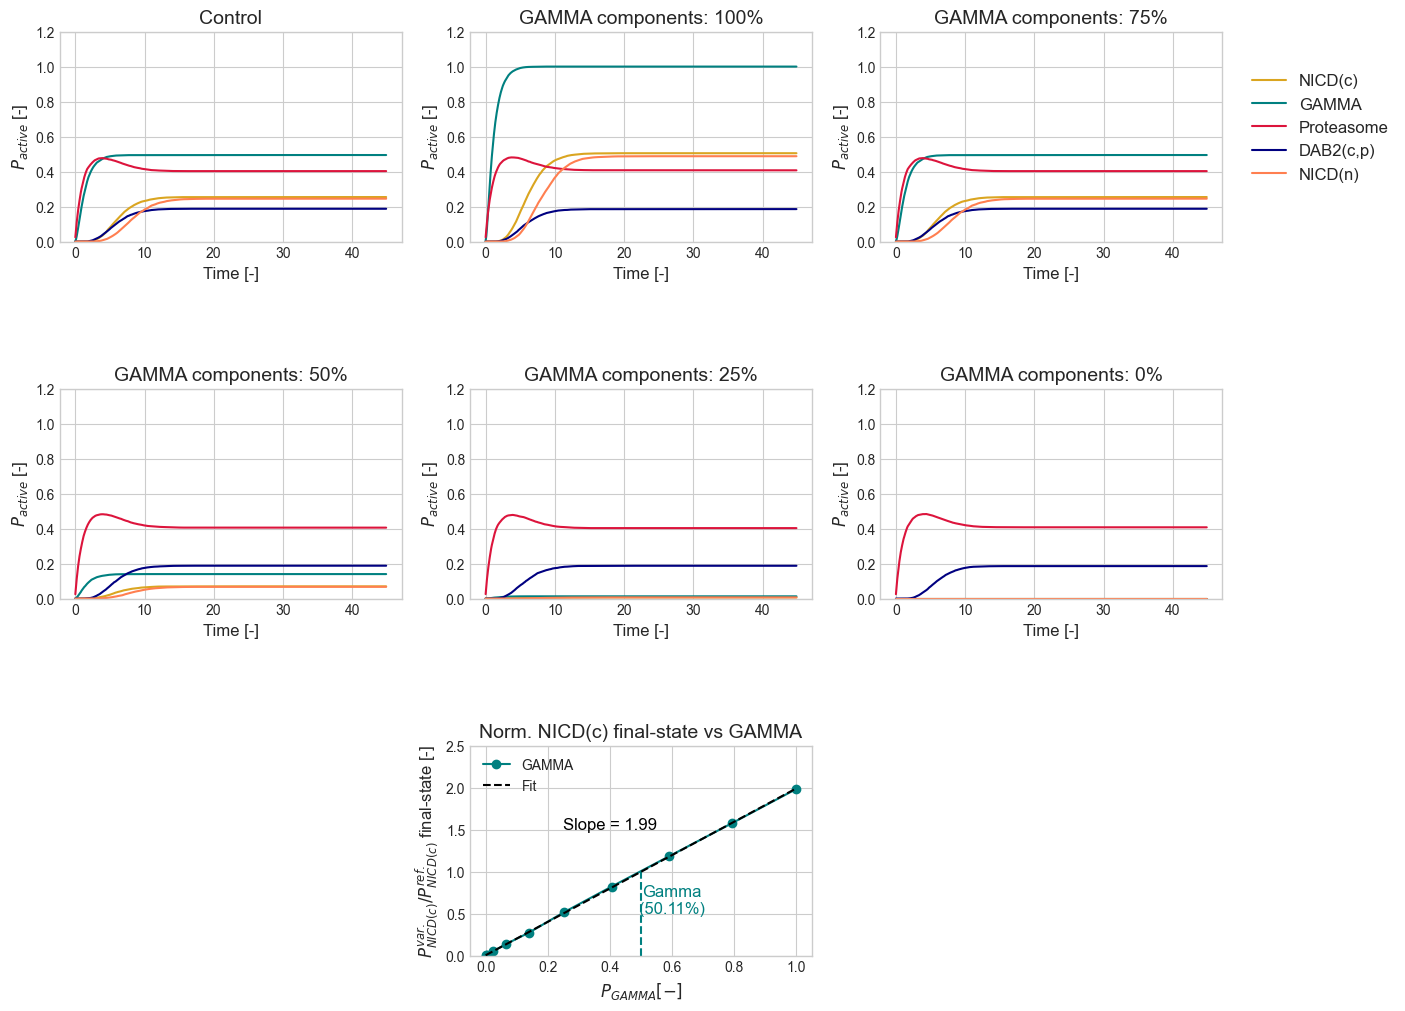

At GAMMA = 0.07932800000000001, predicted normalized NICD(c) = 0.162


In [56]:
fig = plt.figure(figsize=(15, 12))  
gs = gridspec.GridSpec(3, 6, figure=fig)
gs.update(wspace=0.5, hspace=0.7)

axs = [
    fig.add_subplot(gs[0, 0:2]),  
    fig.add_subplot(gs[0, 2:4]),  
    fig.add_subplot(gs[0, 4:6]),  
    fig.add_subplot(gs[1, 0:2]), 
    fig.add_subplot(gs[1, 2:4]),
    fig.add_subplot(gs[1, 4:6]),  
    fig.add_subplot(gs[2, 2:4]),
]

nicdc_curves = []
target_curves = []
x_vals = None

for i, (label, gamma_prob) in enumerate(gamma_states):
    modified_cfg = os.path.join(tempfile.gettempdir(), f"cfg_{label}_random.bnd.cfg")
    modify_parameters(cfg_file, modified_cfg, gamma_prob)

    model = maboss.load(bnd_file, modified_cfg)
    for name in internal_nodes:
        model.network[name].is_internal = True
    model.network.set_output(outputs)
    result = model.run()

    result.plot_node_trajectory()
    temp_ax = plt.gca()
    lines = temp_ax.get_lines()
    plt.close()

    ax = axs[i]
    for line, color, label_name in zip(lines, colors, custom_labels):
        ax.plot(line.get_xdata(), line.get_ydata(), color=color, linewidth=1.5, label=label_name)

    if x_vals is None:
        x_vals = lines[0].get_xdata()
    nicdc_curves.append(lines[0].get_ydata())

    ax.set_title(label, fontsize=14)
    ax.set_xlabel("Time [-]", fontsize=12)
    ax.set_ylabel(r"$P_{active}$ [-]", fontsize=12)
    ax.tick_params(labelsize=10)
    ax.set_ylim(0, 1.2)

for line in lines:
    print(line.get_label())
    
nicdc_ref = nicdc_curves[0]

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="center left", bbox_to_anchor=(0.91, 0.8), fontsize=12)

fig.tight_layout(rect=[0, 0, 0.88, 1])

gamma_values = np.linspace(0, 1, 11)
gamma_nicdc_steady_values = []
gamma_steady_values = []

for val in gamma_values:
    gamma_prob = {'PSENEN': (1 - val, val), 'PSEN1': (1 - val, val), 'PSEN2': (1 - val, val), 'NCSTN': (1 - val, val), 
                  'APH1A': (1 - val, val), 'APH1B': (1 - val, val)}
    modified_cfg = os.path.join(tempfile.gettempdir(), f"cfg_GAMMA_{val:.2f}_sweep.bnd.cfg")
    modify_parameters(cfg_file, modified_cfg, gamma_prob)

    model = maboss.load(bnd_file, modified_cfg)
    for name in internal_nodes:
        model.network[name].is_internal = True
    model.network.set_output(outputs)
    result = model.run()

    result.plot_node_trajectory()
    temp_ax = plt.gca()
    lines = temp_ax.get_lines()
    plt.close()
    
    nicdc_line = lines[0]
    gamma_line = lines[1]
    gamma_nicdc_steady_values.append(nicdc_line.get_ydata()[-1])
    gamma_steady_values.append(gamma_line.get_ydata()[-1])
    
axs[6].plot(gamma_steady_values, gamma_nicdc_steady_values/nicdc_ref[-1], marker='o', color='teal', label="GAMMA")
axs[6].set_title("Norm. NICD(c) final-state vs GAMMA", fontsize=14)
axs[6].set_xlabel(r"$P_{GAMMA} [-]$", fontsize=12)
axs[6].set_ylabel(r"$P^{var.}_{NICD(c)}/P^{ref.}_{NICD(c)}$ final-state [-]", fontsize=12)
axs[6].tick_params(labelsize=10)
axs[6].set_ylim(0, 2.5)

gamma_values_clean = np.array(gamma_steady_values)[~np.isnan(gamma_nicdc_steady_values)]
gamma_nicdc_clean = np.array(gamma_nicdc_steady_values)[~np.isnan(gamma_nicdc_steady_values)]
slope, intercept = np.polyfit(gamma_values_clean, gamma_nicdc_clean/nicdc_ref[-1], 1)
fit_line_GAMMA = slope * gamma_values_clean + intercept
gamma_at_nicdc_eq_1 = (1 - intercept) / slope
axs[6].text(0.25, 1.5, f"Slope = {slope:.2f}", color='black', fontsize=12)
axs[6].vlines(x=gamma_at_nicdc_eq_1, ymin=0, ymax=1.0, color='teal', linestyle='--', linewidth=1.5)
axs[6].text(0.6, 0.5, f'Gamma\n({100*gamma_at_nicdc_eq_1:.2f}%)', color='teal', fontsize=12, ha='center')
axs[6].plot(gamma_values_clean, fit_line_GAMMA, linestyle='--', color='black', label='Fit', zorder=5)
axs[6].legend(fontsize=10)

fig.savefig(
    r".\MaBoSS_figures\GAMMA_knockout_overexpression_semi_quantitative.png",
    dpi=600,
    bbox_inches='tight'
)

plt.show()
x_target = 40 * 0.19832 / 100 # Reduction of GAMMA by 40%
y_target = slope * x_target + intercept
print(f"At GAMMA = {x_target}, predicted normalized NICD(c) = {y_target:.3f}")


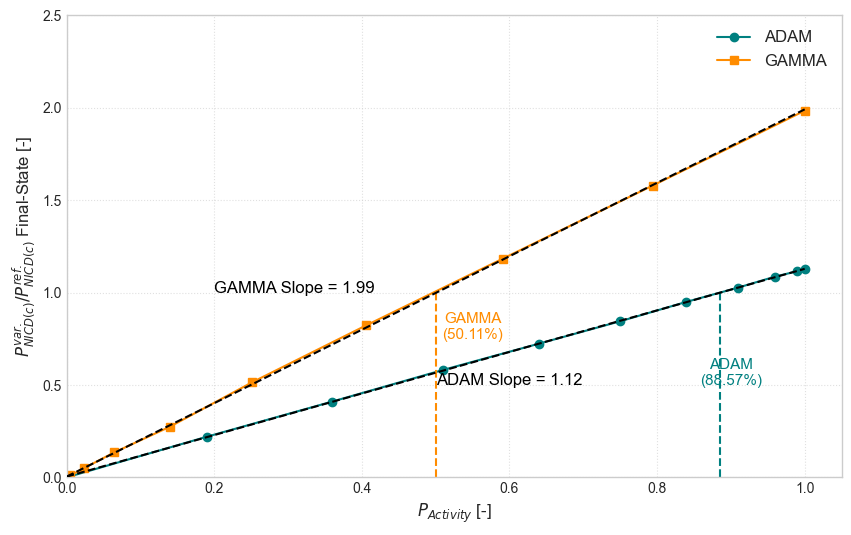

In [57]:
adam_nicdc_norm = np.array(adam_nicdc_steady_values) / nicdc_ref[-1]
gamma_nicdc_norm = np.array(gamma_nicdc_steady_values) / nicdc_ref[-1]

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(adam_steady_values, adam_nicdc_norm, marker='o', color='teal', label='ADAM')
ax.plot(gamma_steady_values, gamma_nicdc_norm, marker='s', color='darkorange', label='GAMMA')

adam_slope, adam_intercept = np.polyfit(adam_steady_values, adam_nicdc_norm, 1)
gamma_slope, gamma_intercept = np.polyfit(gamma_steady_values, gamma_nicdc_norm, 1)
ax.plot(adam_steady_values, adam_slope * np.array(adam_steady_values) + adam_intercept,
        linestyle='--', color='black', zorder=5)
ax.plot(gamma_steady_values, gamma_slope * np.array(gamma_steady_values) + gamma_intercept,
        linestyle='--', color='black', zorder=5)

adam_at_nicdc_eq_1 = (1 - adam_intercept) / adam_slope
ax.vlines(x=adam_at_nicdc_eq_1, ymin=0, ymax=1.0, color='teal', linestyle='--', linewidth=1.5)
ax.vlines(x=gamma_at_nicdc_eq_1, ymin=0, ymax=1.0, color='darkorange', linestyle='--', linewidth=1.5)

ax.text(0.5, 0.5, f"ADAM Slope = {adam_slope:.2f}", fontsize=12, color='black')
ax.text(0.2, 1, f"GAMMA Slope = {gamma_slope:.2f}", fontsize=12, color='black')
ax.text(0.9, 0.5, f"ADAM\n({100*adam_at_nicdc_eq_1:.2f}%)", color='teal',
        fontsize=11, ha='center')
ax.text(0.55, 0.75, f"GAMMA\n({100*gamma_at_nicdc_eq_1:.2f}%)", color='darkorange', fontsize=11, ha='center')

ax.set_xlabel(r"$P_{Activity}$ [-]", fontsize=12)
ax.set_ylabel(r"$P^{var.}_{NICD(c)}/P^{ref.}_{NICD(c)}$ Final-State [-]", fontsize=12)
ax.set_ylim(0, 2.5)
ax.set_xlim(0, 1.05)
ax.tick_params(labelsize=10)
ax.legend(fontsize=12)
ax.grid(True, linestyle=':', alpha=0.6)

fig.savefig(
    r".\MaBoSS_figures\ADAM_vs_GAMMA_semi_quantitative.png",
    dpi=600,
    bbox_inches='tight'
)

plt.show()


* # Knockout: In vitro drug effect

In [58]:
drug_states = [
    ("Control", {'Modification': False}),
    ("LA: IC50", {'VLDLR': {'factor':0.5}}),
    ("SMT: IC50", {'APH1A': {'factor':0.5}, 'APH1B': {'factor':0.5}, 'PSENEN': {'factor':0.5}, 'PSEN1': {'factor':0.5}, 'PSEN2': {'factor':0.5}, 'NCSTN': {'factor':0.5}}),
    ("PP2: IC50", {'FYNs': {'factor':0.5}}),
    ("DAPT: IC50", {'APH1A': {'factor':0.5}, 'APH1B': {'factor':0.5}, 'PSENEN': {'factor':0.5}, 'PSEN1': {'factor':0.5}, 'PSEN2': {'factor':0.5}, 'NCSTN': {'factor':0.5}}),
    ("BB-94: IC50", {'ADAM10': {'factor':0.5}, 'ADAM17': {'factor':0.5}}),
    ("PP2 + DAPT", {'APH1A': {'factor':0.5}, 'APH1B': {'factor':0.5}, 'PSENEN': {'factor':0.5}, 'PSEN1': {'factor':0.5}, 'PSEN2': {'factor':0.5}, 'NCSTN': {'factor':0.5}, 
                    'FYNs': {'factor':0.5}})
]

outputs = ['ADAM', 'GAMMA', 'FYN', 'VLDLR', 'NICDc', 'PROTEASOME', 'DAB2cp', 'NICDn']
custom_labels = ['VLDLR', 'FYN', 'NICD(c)', 'GAMMA', 'ADAM', 'Proteasome', 'DAB2(c,p)', 'NICD(n)']
colors = ["violet", "black", "goldenrod", "palegreen", "teal", "crimson", "navy", "coral"]

VLDLR
FYN
NICDc
GAMMA
ADAM
PROTEASOME
DAB2cp
NICDn


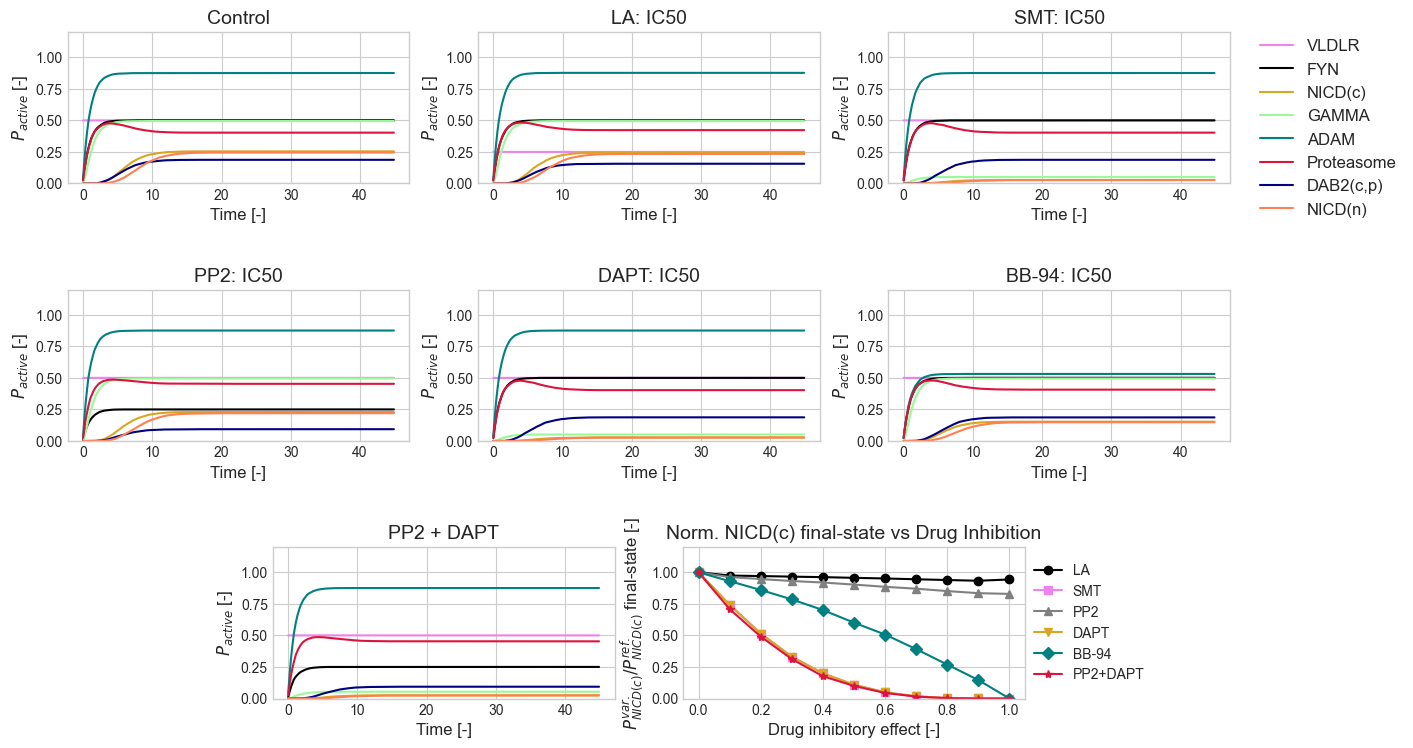

In [59]:
fig = plt.figure(figsize=(15, 12))  
gs = gridspec.GridSpec(4, 6, figure=fig)
gs.update(wspace=0.5, hspace=0.7)

axs = [
    fig.add_subplot(gs[0, 0:2]),  
    fig.add_subplot(gs[0, 2:4]),  
    fig.add_subplot(gs[0, 4:6]),  
    fig.add_subplot(gs[1, 0:2]), 
    fig.add_subplot(gs[1, 2:4]),
    fig.add_subplot(gs[1, 4:6]),
    fig.add_subplot(gs[2, 1:3]),
    fig.add_subplot(gs[2, 3:5]), 
]

nicdc_curves = []
target_curves = []
x_vals = None

for i, (label, drug_prob) in enumerate(drug_states):
    modified_cfg = os.path.join(tempfile.gettempdir(), f"cfg_{label}_random.bnd.cfg")
    modify_parameters(cfg_file, modified_cfg, drug_prob)

    model = maboss.load(bnd_file, modified_cfg)
    for name in internal_nodes:
        model.network[name].is_internal = True
    model.network.set_output(outputs)
    result = model.run()

    result.plot_node_trajectory()
    temp_ax = plt.gca()
    lines = temp_ax.get_lines()
    plt.close()

    ax = axs[i]
    for line, color, label_name in zip(lines, colors, custom_labels):
        ax.plot(line.get_xdata(), line.get_ydata(), color=color, linewidth=1.5, label=label_name)

    if x_vals is None:
        x_vals = lines[0].get_xdata()
    nicdc_curves.append(lines[2].get_ydata())
    target_curves.append(lines[4].get_ydata())

    ax.set_title(label, fontsize=14)
    ax.set_xlabel("Time [-]", fontsize=12)
    ax.set_ylabel(r"$P_{active}$ [-]", fontsize=12)
    ax.tick_params(labelsize=10)
    ax.set_ylim(0, 1.2)

for line in lines:
    print(line.get_label())
    
nicdc_ref = nicdc_curves[0]

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="center left", bbox_to_anchor=(0.91, 0.8), fontsize=12)

fig.tight_layout(rect=[0, 0, 0.88, 1])

drug_sweep_values = np.linspace(0, 1, 11)  
drug_effects_all = []
nicdc_vals_all = []
drug_names_all = []

for drug_name, targets in drug_states[1:]:  # Skip "Control"
    for inhib in drug_sweep_values:
        mod = {}
        for key, val in targets.items():
            mod[key] = {'factor': inhib}

        modified_cfg = os.path.join(tempfile.gettempdir(), f"cfg_{drug_name.replace(' ', '_')}_{inhib:.2f}.bnd.cfg")
        modify_parameters(cfg_file, modified_cfg, mod)

        model = maboss.load(bnd_file, modified_cfg)
        for node in internal_nodes:
            model.network[node].is_internal = True
        model.network.set_output(outputs)
        result = model.run()

        result.plot_node_trajectory()
        lines = plt.gca().get_lines()
        plt.close()

        try:
            nicdc_line = lines[2]  
            final_val = nicdc_line.get_ydata()[-1]
            nicdc_vals_all.append(final_val)
            drug_effects_all.append(1 - inhib)  
            drug_names_all.append(drug_name)
        except Exception:
            nicdc_vals_all.append(np.nan)
            drug_effects_all.append(np.nan)
            drug_names_all.append(drug_name)

drug_effects_arr = np.array(drug_effects_all)
nicdc_vals_arr = np.array(nicdc_vals_all)
drug_names_arr = np.array(drug_names_all)
mask = ~np.isnan(drug_effects_arr) & ~np.isnan(nicdc_vals_arr)
drug_effects_arr = drug_effects_arr[mask]
nicdc_vals_arr = nicdc_vals_arr[mask]
drug_names_arr = drug_names_arr[mask]

axs[7].set_title("Norm. NICD(c) final-state vs Drug Inhibition", fontsize=14)
axs[7].set_xlabel("Drug inhibitory effect [-]", fontsize=12)
axs[7].set_ylabel(r"$P^{var.}_{NICD(c)}/P^{ref.}_{NICD(c)}$ final-state [-]", fontsize=12)
axs[7].tick_params(labelsize=10)
axs[7].set_ylim(0, 1.2)

drug_plot_colors = ['black', 'violet', 'gray', 'goldenrod', 'teal', 'crimson']
markers = ['o', 's', '^', 'v', 'D', '*']

slope_lines = []
legend_lines = []
legend_labels = []

label_new = ["LA", "SMT", "PP2", "DAPT", "BB-94", "PP2+DAPT"]
for i, (drug_name, _) in enumerate(drug_states[1:]):  # skip "Control"
    mask = np.array(drug_names_all) == drug_name
    x_vals = np.array(drug_effects_all)[mask]
    y_vals = np.array(nicdc_vals_all)[mask]

    clean_x = x_vals[~np.isnan(y_vals)]
    clean_y = y_vals[~np.isnan(y_vals)]

    if len(clean_x) > 1:
        color = drug_plot_colors[i % len(drug_plot_colors)]
        marker = markers[i % len(markers)]
        axs[7].plot(clean_x, clean_y/nicdc_ref[-1], marker=marker, color=color,
                    linestyle='-', label=label_new[i])


        legend_lines.append(axs[7].plot([], [], marker=marker, color=color,
                                        linestyle='-')[0])
        legend_labels.append(label_new[i])

axs[7].legend(
    legend_lines,
    legend_labels,
    fontsize=10,
    loc='center left',
    bbox_to_anchor=(1.01, 0.5),  # Right outside the axis
    ncol=1,                      # Single column
    borderaxespad=0.0
)

fig.savefig(
    r".\MaBoSS_figures\drugs_semi_quantitative.png",
    dpi=600,
    bbox_inches='tight'
)

plt.show()


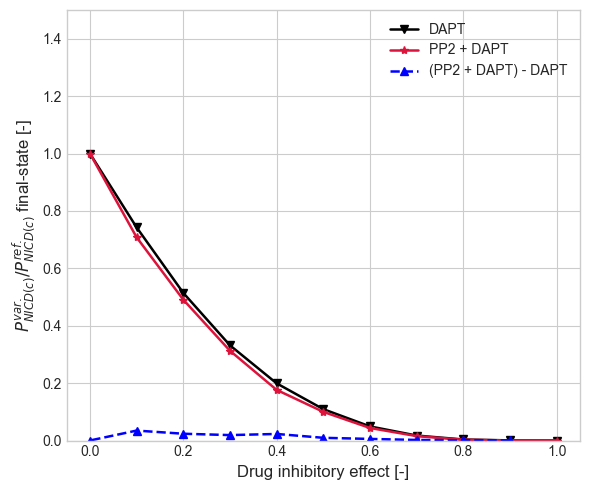

3.457760314341851


In [60]:
dapts = ["DAPT: IC50", "PP2 + DAPT"]
dapts_clean = ["DAPT", "PP2 + DAPT"]  
colors = ['black', 'crimson']
markers = ['v', '*']

plt.figure(figsize=(6, 5))

curves = {}
for i, drug in enumerate(dapts):
    mask = np.array(drug_names_all) == drug
    x = np.array(drug_effects_all)[mask]
    y = np.array(nicdc_vals_all)[mask] / nicdc_ref[-1]

    clean_x = x[~np.isnan(y)]
    clean_y = y[~np.isnan(y)]
    curves[drug] = (clean_x, clean_y)

    if len(clean_x) > 0:
        plt.plot(clean_x, clean_y, marker=markers[i], color=colors[i], linewidth=1.8,
                 label=dapts_clean[i])  

if all(drug in curves for drug in dapts):
    x_dapt, y_dapt = curves[dapts[0]]
    x_combo, y_combo = curves[dapts[1]]

    diff_x = []
    diff_y = []
    for xc, yc in zip(x_combo, y_combo):
        if xc in x_dapt:
            yd = y_dapt[np.where(x_dapt == xc)[0][0]]
            if not np.isnan(yd) and yd != 0:
                diff_x.append(xc)
                diff_y.append(yd - yc)

    plt.plot(diff_x, diff_y, marker='^', color='blue', linestyle='--',
             linewidth=1.8, label="(PP2 + DAPT) - DAPT")

plt.xlabel("Drug inhibitory effect [-]", fontsize=12)
plt.ylabel(r"$P^{var.}_{NICD(c)}/P^{ref.}_{NICD(c)}$ final-state [-]", fontsize=12)
plt.ylim(0, 1.5)
plt.legend(loc="best", fontsize=10)
plt.grid(True)
plt.tight_layout()

plt.savefig(r".\MaBoSS_figures\combi_drug_vs_DAPT_semi_quantitative.png", dpi=600, bbox_inches='tight')
plt.show()

print(np.max(diff_y) * 100)


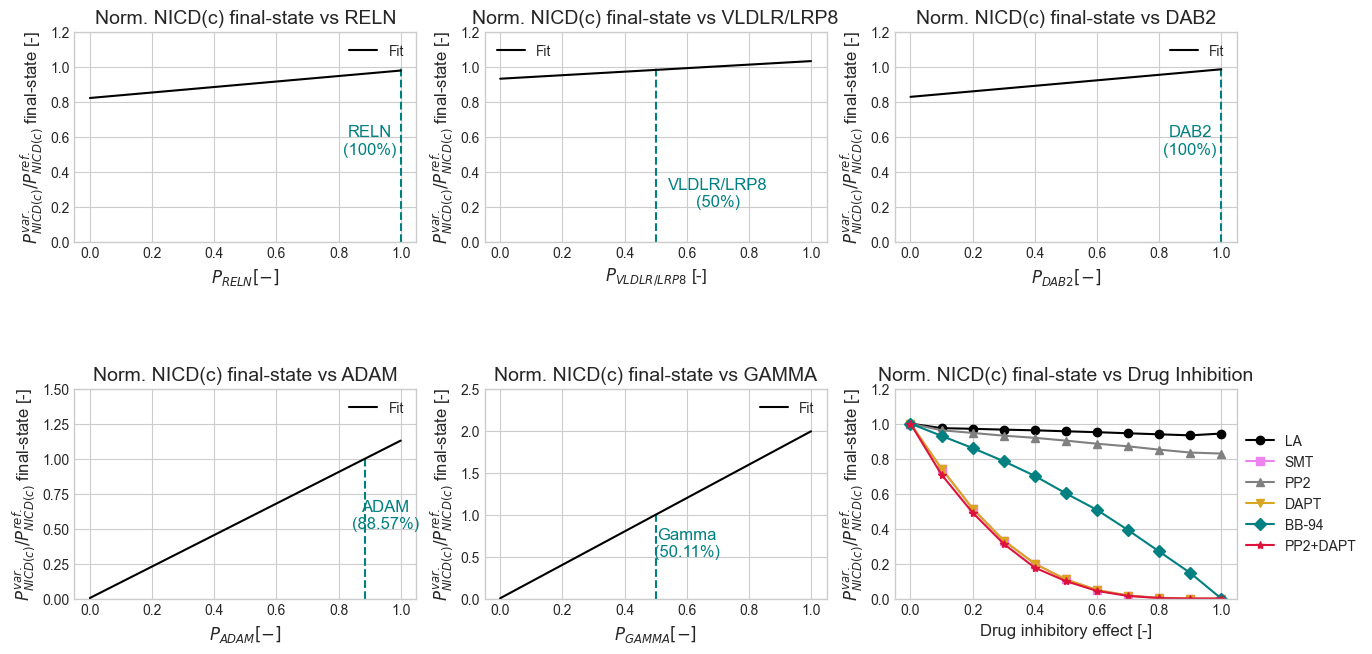

In [61]:
fig = plt.figure(figsize=(15, 12))  
gs = gridspec.GridSpec(3, 6, figure=fig)
gs.update(wspace=0.5, hspace=0.7)

axs = [
    fig.add_subplot(gs[0, 0:2]),  
    fig.add_subplot(gs[0, 2:4]),  
    fig.add_subplot(gs[0, 4:6]),  
    fig.add_subplot(gs[1, 0:2]), 
    fig.add_subplot(gs[1, 2:4]),
    fig.add_subplot(gs[1, 4:6])]

axs[0].set_title("Norm. NICD(c) final-state vs RELN", fontsize=14)
axs[0].set_xlabel(r"$P_{RELN} [-]$", fontsize=12)
axs[0].set_ylabel(r"$P^{var.}_{NICD(c)}/P^{ref.}_{NICD(c)}$ final-state [-]", fontsize=12)
axs[0].vlines(x=1.0, ymin=0, ymax=1.0, color='teal', linestyle='--', linewidth=1.5)
axs[0].text(0.9, 0.5, 'RELN\n(100%)', color='teal', fontsize=12, ha='center')
axs[0].tick_params(labelsize=10)
axs[0].set_ylim(0, 1.2)
axs[0].plot(reln_values_clean, fit_line_RELN, color='black', label='Fit', zorder=5)
axs[0].legend(fontsize=10)


axs[1].set_title("Norm. NICD(c) final-state vs VLDLR/LRP8", fontsize=14)
axs[1].set_xlabel(r"$P_{VLDLR/LRP8}$ [-]", fontsize=12)
axs[1].set_ylabel(r"$P^{var.}_{NICD(c)}/P^{ref.}_{NICD(c)}$ final-state [-]", fontsize=12)
axs[1].vlines(x=0.5, ymin=0, ymax=1.0, color='teal', linestyle='--', linewidth=1.5)
axs[1].text(0.7, 0.2, 'VLDLR/LRP8\n(50%)', color='teal', fontsize=12, ha='center')
axs[1].tick_params(labelsize=10)
axs[1].set_ylim(0, 1.2)
axs[1].plot(clean_vldlr_x, fit_VLDLR_LRP8, linewidth=1.5, color='black', label="Fit", zorder=5)
axs[1].legend(fontsize=10)

axs[2].set_title("Norm. NICD(c) final-state vs DAB2", fontsize=14)
axs[2].set_xlabel(r"$P_{DAB2} [-]$", fontsize=12)
axs[2].set_ylabel(r"$P^{var.}_{NICD(c)}/P^{ref.}_{NICD(c)}$ final-state [-]", fontsize=12)
axs[2].vlines(x=1.0, ymin=0, ymax=1.0, color='teal', linestyle='--', linewidth=1.5)
axs[2].text(0.9, 0.5, 'DAB2\n(100%)', color='teal', fontsize=12, ha='center')
axs[2].tick_params(labelsize=10)
axs[2].set_ylim(0, 1.2)
axs[2].plot(dab2_values_clean, fit_line_DAB2, color='black', label='Fit', zorder=5)
axs[2].legend(fontsize=10)

axs[3].set_title("Norm. NICD(c) final-state vs ADAM", fontsize=14)
axs[3].set_xlabel(r"$P_{ADAM} [-]$", fontsize=12)
axs[3].set_ylabel(r"$P^{var.}_{NICD(c)}/P^{ref.}_{NICD(c)}$ final-state [-]", fontsize=12)
axs[3].tick_params(labelsize=10)
axs[3].set_ylim(0, 1.5)
axs[3].vlines(x=adam_at_nicdc_eq_1, ymin=0, ymax=1.0, color='teal', linestyle='--', linewidth=1.5)
axs[3].text(0.95, 0.5, f'ADAM\n({100*adam_at_nicdc_eq_1:.2f}%)', color='teal', fontsize=12, ha='center')
axs[3].plot(adam_values_clean, fit_line_ADAM, color='black', label='Fit', zorder=5)
axs[3].legend(fontsize=10)

axs[4].set_title("Norm. NICD(c) final-state vs GAMMA", fontsize=14)
axs[4].set_xlabel(r"$P_{GAMMA} [-]$", fontsize=12)
axs[4].set_ylabel(r"$P^{var.}_{NICD(c)}/P^{ref.}_{NICD(c)}$ final-state [-]", fontsize=12)
axs[4].tick_params(labelsize=10)
axs[4].set_ylim(0, 2.5)
axs[4].vlines(x=gamma_at_nicdc_eq_1, ymin=0, ymax=1.0, color='teal', linestyle='--', linewidth=1.5)
axs[4].text(0.6, 0.5, f'Gamma\n({100*gamma_at_nicdc_eq_1:.2f}%)', color='teal', fontsize=12, ha='center')
axs[4].plot(gamma_values_clean, fit_line_GAMMA, color='black', label='Fit', zorder=5)
axs[4].legend(fontsize=10)

axs[5].set_title("Norm. NICD(c) final-state vs Drug Inhibition", fontsize=14)
axs[5].set_xlabel("Drug inhibitory effect [-]", fontsize=12)
axs[5].set_ylabel(r"$P^{var.}_{NICD(c)}/P^{ref.}_{NICD(c)}$ final-state [-]", fontsize=12)
axs[5].tick_params(labelsize=10)
axs[5].set_ylim(0, 1.2)

drug_plot_colors = ['black', 'violet', 'gray', 'goldenrod', 'teal', 'crimson']
markers = ['o', 's', '^', 'v', 'D', '*']

legend_lines = []
legend_labels = []

for i, (drug_name, _) in enumerate(drug_states[1:]):  # skip "Control"
    mask = np.array(drug_names_all) == drug_name
    x_vals = np.array(drug_effects_all)[mask]
    y_vals = np.array(nicdc_vals_all)[mask]

    clean_x = x_vals[~np.isnan(y_vals)]
    clean_y = y_vals[~np.isnan(y_vals)]

    if len(clean_x) > 1:
        color = drug_plot_colors[i % len(drug_plot_colors)]
        marker = markers[i % len(markers)]
        axs[5].plot(clean_x, clean_y / nicdc_ref[-1], marker=marker, color=color,
                    linestyle='-', label=label_new[i])

        legend_lines.append(axs[5].plot([], [], marker=marker, color=color, linestyle='-')[0])
        legend_labels.append(label_new[i])

axs[5].legend(
    legend_lines,
    legend_labels,
    fontsize=10,
    loc='center left',
    bbox_to_anchor=(1.01, 0.5),
    ncol=1,
    borderaxespad=0.0
)

plt.savefig(
    r".\MaBoSS_figures\correlation_comparison_semi_quantitative.png",
    dpi=600,
    bbox_inches='tight'
)